<a href="https://colab.research.google.com/github/anslemhuncho/MACHINE-LEARNING-PROJECT/blob/main/ResNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Found 3747 images belonging to 10 classes.
Found 411 images belonging to 10 classes.
Found 2069 images belonging to 10 classes.
Epoch 1/10
188/188 [==============================] - 1101s 6s/step - loss: 13.2005 - accuracy: 0.1294 - val_loss: 2.2934 - val_accuracy: 0.1375
Epoch 2/10
188/188 [==============================] - 93s 492ms/step - loss: 2.2946 - accuracy: 0.1316 - val_loss: 2.2838 - val_accuracy: 0.1375
Epoch 3/10
188/188 [==============================] - 91s 481ms/step - loss: 2.2832 - accuracy: 0.1321 - val_loss: 2.2771 - val_accuracy: 0.1375
Epoch 4/10
188/188 [==============================] - 92s 487ms/step - loss: 2.2785 - accuracy: 0.1334 - val_loss: 2.2722 - val_accuracy: 0.1400
Epoch 5/10
188/188 [==============================] - 96s 510ms/step - loss: 2.2754 - accuracy: 0.1302 - val_loss: 2.2693 - val_accuracy: 0.1400
Epoch 6/10
188/188 [==============================] - 95s 504ms/step - loss: 2.2736 - accuracy: 0.1308 - val_loss: 2.2674 - val_accuracy: 0.1400
Ep

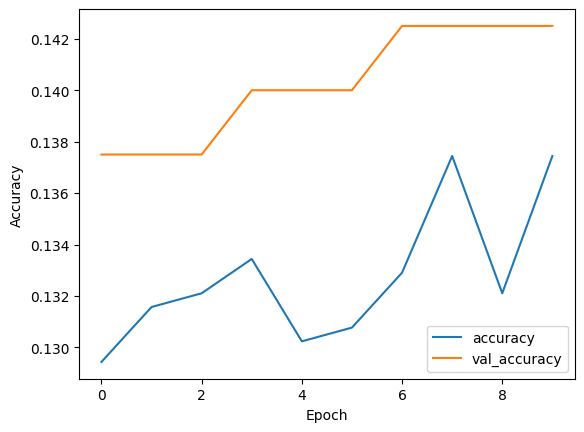

In [3]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Define paths to your train and test folders
train_path = '/content/drive/MyDrive/Normalised data/train'
test_path = '/content/drive/MyDrive/Normalised data/test'

# Set up data generators with data augmentation and preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.1  # Add validation split here
)

# Adjust batch size based on your system's memory
batch_size =20
# Define the list of class labels corresponding to your dataset
class_labels = ['animals_protection', 'appealing_for_peace', 'brexit', 'covid19', 'election', 'environment_protection', 'gender_equality', 'immigration', 'racial_equality', 'yellow_vests_movement']

# Generate batches of augmented data from train and test folders with validation split
train_generator = datagen.flow_from_directory(
    train_path,
    target_size=(254, 254),
    batch_size=batch_size,
    class_mode='categorical',
    classes=class_labels,  # Manually specify class labels
    shuffle=True,
    subset='training'  # Specify subset as training for train data
)

validation_generator = datagen.flow_from_directory(
    train_path,
    target_size=(254, 254),
    batch_size=batch_size,
    class_mode='categorical',
    classes=class_labels,  # Manually specify class labels
    shuffle=False,
    subset='validation'  # Specify subset as validation for validation data
)

test_generator = datagen.flow_from_directory(
    test_path,
    target_size=(254, 254),
    batch_size=batch_size,
    class_mode='categorical',
    classes=class_labels,  # Manually specify class labels
    shuffle=False
)

# Define the ResNet model architecture
def build_resnet_model():
    base_model = ResNet50(include_top=False, weights=None, input_shape=(254, 254, 3))
    x = base_model.output
    x = Flatten()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.2)(x)
    predictions = Dense(len(class_labels), activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=predictions)
    model.compile(optimizer=Adam(learning_rate=1e-3),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Build the ResNet model
resnet_model = build_resnet_model()

# Train the ResNet model
history = resnet_model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    callbacks=[EarlyStopping(patience=3)]
)

# Evaluate the ResNet model on the test data
test_loss_resnet, test_accuracy_resnet = resnet_model.evaluate(test_generator)
print(f'Test Accuracy of ResNet Model: {test_accuracy_resnet}')

# Plot training history of the ResNet model
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

